In [1]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# CHAPITRE 5 - Révisions résolution numérique d'équations différentielles

L'idée est de réaliser une intégration numérique de l'équation différentielle afin d'obtenir de proche en proche les points correspondant à une solution.

Ainsi la moindre erreur sur un point entrainera une erreur sur tout ce qui suit et le choix du pas d'intégration et de la méthode utilisée doit être adapté à la précision et à la durée de simulation voulue.

## I. Méthode d'Euler

### I.1. Equation différentielle linéaire de premier ordre

On partira de l'équation différentielle $y' + y = 0$ et la condition initiale $y(t_0) = 1$ pour montrer le principe et pour pouvoir comparer le résultat de la méthode numérique (approchée) à la solution exacte

Intégrons cette équation différentielle sur un intervalle de temps $[t_i, t_{i+1}]$  

$\int_{t_i}^{t_{i+1}}{(y'(t) + y(t))dt} = 0$  
d'où $\int_{t_i}^{t_{i+1}}{y'(t)dt} = - \int_{t_i}^{t_{i+1}}{y(t)dt}$  
et donc $y(t_{i+1}) = y(t_i) - \int_{t_i}^{t_{i+1}}{y(t)dt}$  


On approxime ensuite l'intégrale de droite en utilisant la méthode des rectangles:  
d'où $y(t_{i+1}) \approx y(t_i) - \int_{t_i}^{t_{i+1}}{y(t_i)dt} = y(t_i) - y(t_i) \times (t_{i+1} - t_i) = y(t_i) - y(t_i) dt$ avec dt le pas de temps utilisé.  


On a ainsi accès à $y(t_{i+1})$ connaissant $y(t_i)$ et donc à une approximation de la représentation de $y(t)$ connaissant $y(t_0)$

### Exercice 1
1. Réalisez la construction des tableaux de valeurs de t et y(t) obtenus par la méthode d'Euler pour t allant de 0 à 10 et un pas de temps de 0.001s . Affichez la courbe ainsi obtenue.
2. Affichez sur un même graphique les résultats obtenus pour différentes valeurs du pas de temps ainsi que la solution analytique du problème

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


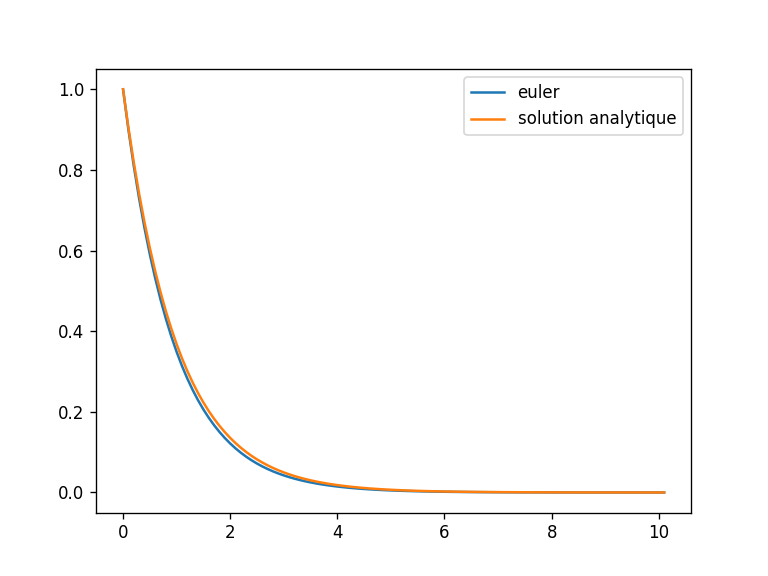

In [3]:
def euler1(y0,dt,tmax):
    # construction de la liste des t et des y
    t = [0]
    y = [y0]
    while t[-1]<tmax:
        t.append(t[-1] + dt)
        y.append(y[-1] - dt*y[-1])
    return t,y

t,y = euler1(1,0.1,10)

from math import exp
sol = []
for val in t:
    sol.append(exp(-val))
    
import matplotlib.pyplot as plt
plt.figure("euler1 avec pas de temps trop grand")
plt.plot(t,y,label="euler")
plt.plot(t,sol,label="solution analytique")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


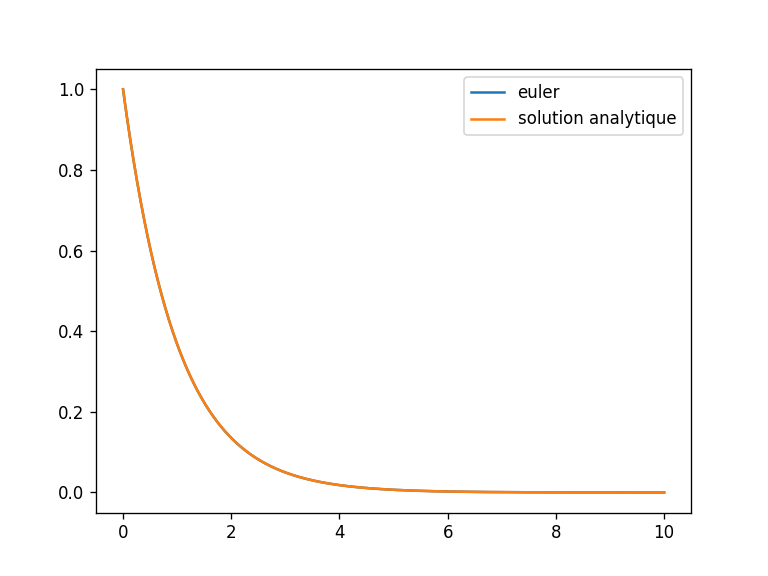

In [4]:

t,y = euler1(1,0.001,10)

from math import exp
sol = []
for val in t:
    sol.append(exp(-val))
    
import matplotlib.pyplot as plt
plt.figure("euler1 avec pas de temps correct")
plt.plot(t,y,label="euler")
plt.plot(t,sol,label="solution analytique")
plt.legend()
plt.show()

$y(t_i)(1-h) = y(t_{i-1})$ soit$y(t_i+1) = y(t_i)/(1-h)$

On peut aussi voir ça en partant de la définition de la dérivée

$$y'(t_i) = \lim_{h \to 0}  \frac{y(t_i + h) - y(t_i)}{h}$$  
En prenant h petit (pas de temps utilisé pour la simulation) on obtient:  
$y'(t_i) \approx \frac{y(t_{i+1}) - y(t_i)}{h}$  


d'où en remplaçant y' par cette expression approchée dans l'équation différentielle:  
$\frac{y(t_{i+1}) - y(t_i)}{h} + y(t_i) = 0$  
et donc $y(t_{i+1}) = y(t_i) - h\times y(t_i)$




### I.2. Cas d'une équation différentielle linéaire d'ordre 2

On partira de l'équation différentielle $y'' + {\omega_0}^2 y = 0$ et la condition initiale $y(t_0) = 1$ et $y'(t_0) = 0$. On prendra aussi $\omega_0 = 2\pi$ pour montrer le principe et pour pouvoir comparer le résultat de la méthode numérique (approchée) à la solution exacte

Il faut décomposer l'équation différentielle d'ordre 2 en un système de deux équations d'ordre 1:
Si on note $u = y$ et $v = y'$ cela donne

$u'= v$ et $v' = - {\omega_0}^2 u$ que l'on peut intégrer comme précédemment  
d'où $u(t_{i+1}) - u(t_i) \approx v(t_i)\times dt$ et $v(t_{i+1}) - v(t_i) \approx -{\omega_0}^2 u(t_i) dt$  

Ainsi connaissant $u(t_i)$ et $v(t_i)$ on peut déterminer une approximation de $u(t_{i+1})$ et de $v(t_{i+1})$ et donc connaissant $u(t_0)$ et $v(t_0)$ on peut construire de proche en proche une approximation de la représentation de la solution. 

### Exercice 2
1. Réalisez la construction des tableaux de valeurs de t, y(t) et y'(t) obtenus par la méthode d'Euler pour t allant de 0 à 3 et un pas de temps de 0.001s . Affichez la courbe ainsi obtenue.
2. Affichez sur un même graphique les résultats obtenus pour différentes valeurs du pas de temps ainsi que la solution analytique du problème
3. Si on considère un problème d'oscillateur harmonique, que peut-on dire de l'énergie ?

<IPython.core.display.Javascript object>


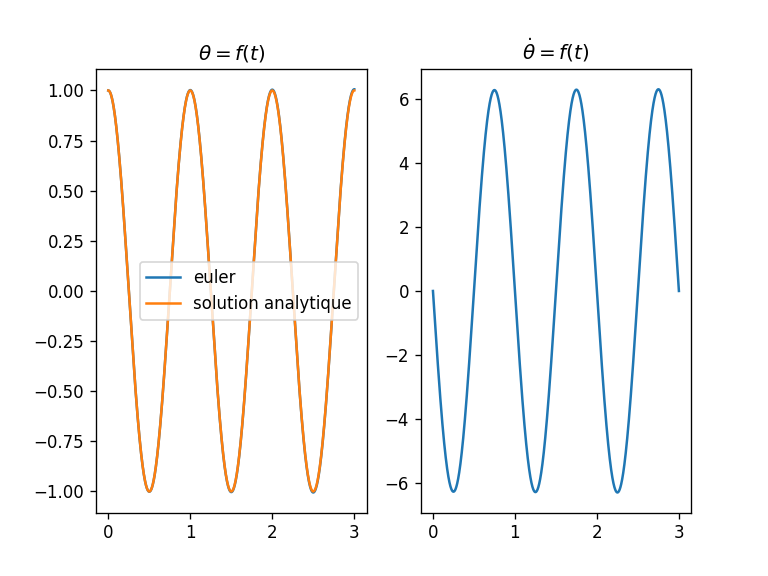

In [5]:
from math import cos, pi

def euler2(y0,yprim0,dt,tmax):
    # construction de la liste des t et des y
    w0 = 2*pi
    t = [0]
    y = [y0]
    yprim = [yprim0]
    
    while t[-1]<tmax:
        t.append(t[-1] + dt)
        y.append(y[-1] + yprim[-1]*dt)
        yprim.append(yprim[-1] - w0**2*y[-2]*dt)
    return t, y, yprim

t, y, yprim = euler2(1.,0.,0.0001,3)

sol = []
for val in t:
    sol.append(cos(2*pi*val))
    
import matplotlib.pyplot as plt
plt.figure("euler2")
plt.subplot(1,2,1)
plt.plot(t,y,label="euler")
plt.plot(t,sol,label="solution analytique")
plt.title(r"$\theta = f(t)$")
plt.legend()
plt.subplot(1,2,2)
plt.plot(t,yprim)
plt.title(r"$\dot{\theta} = f(t)$")

plt.show()

## II. méthode de Heun

On utilise ici l'intégration par la méthode des trapèzes, y(t+dt) étant déterminé par la méthode d'Euler. Cette méthode permet donc d'affiner le résultat donné par la méthode d'Euler et donc de gagner en précision pour un même pas ou de réduire le nombre d epas pour obtenir la même précision.

Pour l'équation d'ordre 1 $y' + y = 0$ on a  

$y(t_{i+1}) = y(t_i) - \int_{t_i}^{t_{i+1}}{y(t)dt}$  
On approxime ensuite l'intégrale de droite en utilisant la méthode des trapèzes:  
d'où $y(t_{i+1}) \approx y(t_i) - \frac{y(t_{i+1})_{Euler} + y(t_i)}{2} \times dt$ avec dt le pas de temps utilisé. 

### Exercice 3
1. Proposez une implémentation de cette méthode dans les conditions de l'exercice 1
2. Même question dans le cas des conditions de l'exercice 2
3. Comparer la précision obtenue avec cette méthode et celle d'Euler

<IPython.core.display.Javascript object>


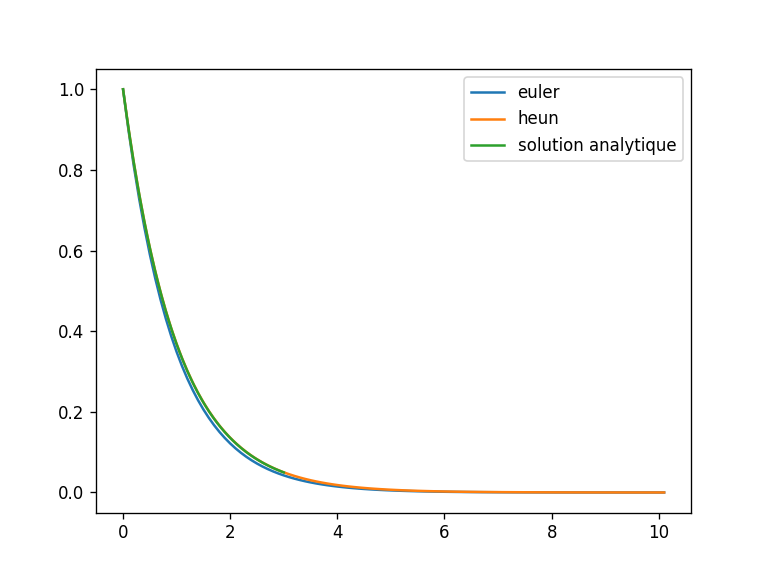

In [6]:
def heun1(y0,dt,tmax):
    # construction de la liste des t et des y
    t = [0]
    y = [y0]
    while t[-1]<tmax:
        t.append(t[-1] + dt)
        ytemp = y[-1] - dt*y[-1] # equa diff en dur
        y.append(y[-1] - dt/2 * (ytemp + y[-1]))  # relation de rec schéma de heun
    return t,y

th,yh = heun1(1,0.1,10)
te,ye = euler1(1,0.1,10)

from math import exp
sol = []
for val in t:
    sol.append(exp(-val))
    
import matplotlib.pyplot as plt
plt.figure("heun1")
plt.clf()
plt.plot(te,ye,label="euler")
plt.plot(th,yh,label="heun")
plt.plot(t,sol,label="solution analytique")
plt.legend()
plt.show()

## III. Méthode de Leapfrog

Pour cette méthode on désynchronise y et y' qui ne seront pas calculées au même point.

On partira de l'équation différentielle $y'' + {\omega_0}^2 y = 0$ et la condition initiale $y(t_0) = 1$ et $y'(t_0) = 0$. On prendra aussi $\omega_0 = 2\pi$
On notera dt le pas de temps, $t_i = t_0 + i\times dt$ et donc par analogie $t_{i+1/2} = t_0 + i\times dt + 0.5\times dt$

On utilise l'approximation $y'(t_i) = \frac{y(t_{i+1/2}) - y(t_{i-1/2})}{dt}$
1. On calcule $y(t_{1/2})$ par un pas de dt/2 en utilisant la méthode d'Euler
2. Supposons que $y(t_{i-1/2})$ et $y'(t_i)$ sont connus:
    * On calcule $y(t_{i+1/2}) = y(t_{i-1/2}) + dt\times y'(t_i)$
    * On calcule ensuite $y'(t_{i+1}) = y'(t_i) - dt\times {\omega_0}^2 y(t_{i+1/2})$
3. On a alors avancé d'un pas et on peut ainsi poursuivre


Cela correspond à utiliser une méthode des rectangles pour l'intégration de l'équation différentielle en prenant la valeur de la fonction au milieu de chaque petit intervalle (fonction demi du cours précédent).

### Exercice 4
1. Proposez une implémentation de cette méthode dans ces conditions
2. Comparer la précision avec celle des méthodes précédentes

<IPython.core.display.Javascript object>


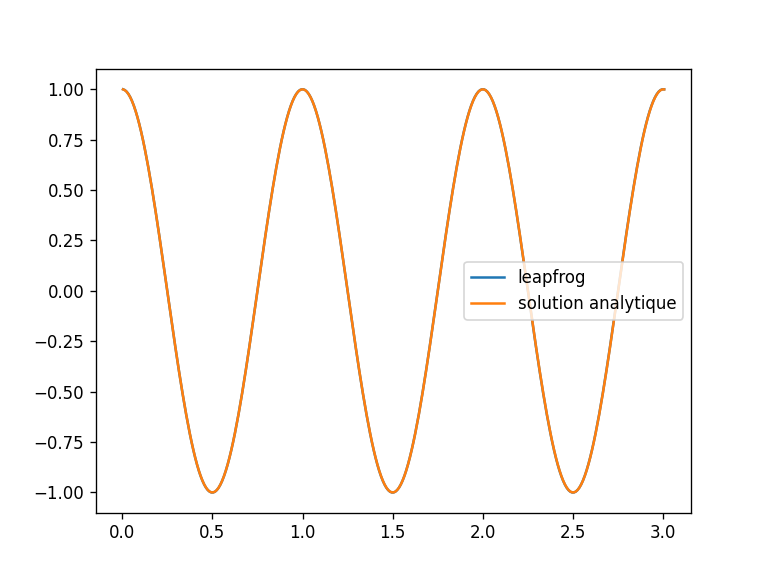

In [7]:
def leapfrog(y0,yprim0,dt,tmax):
    yprim = [yprim0]
    
    y = []
    y.append(y0 + yprim0*dt/2) # calcul de y_i+0.5
    
    t = [dt/2] # temps adapté aux positions
    
    w0 = 2*pi
    
    while t[-1] < tmax:
        t. append(t[-1] + dt)
        yprim.append(yprim[-1] - dt*w0**2*y[-1])
        y.append(y[-1] + dt*yprim[-1])
    return t,y

t,y = leapfrog(1., 0., 0.01, 3.)

sol = []
for val in t:
    sol.append(cos(2*pi*val))
    
plt.figure("leapfrog")
plt.plot(t,y,label="leapfrog")
plt.plot(t,sol,label="solution analytique")
plt.legend()
plt.show()

## IV. Utilisation des vecteurs

On peut écrire une équation différentielle sous forme vectorielle:
on considère le vecteur v = (y, y') et l'équation différentielle $y'' + {\omega_0}^2 y = 0$, elle peut alors se noter $v' = f(v,t)$ soit $(v[0]', v[1]') = (v[1], -{\omega_0}^2 v[0])$

On peut alors appliquer la méthode d'Euler en réalisant directement sur le vecteur $y(t+dt) = y(t) + f(y,t)\times dt$

### Exercice 5
1. Implémentez une version vectorielle de la méthode d'Euler (en utilisant numpy)
2. Même question pour une version vectorielle de la méthode de Heun

In [8]:
import numpy as np


<IPython.core.display.Javascript object>


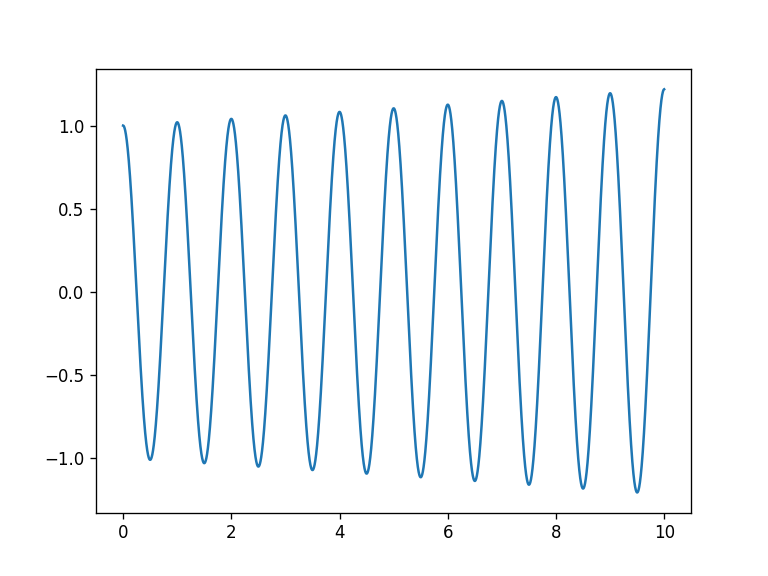

In [9]:
def vect(y0,yprim0,dt,tmax):
    n = int(tmax/dt)
    w0 = 2*pi
    
    t = np.arange(0,tmax,dt)
    Y = np.zeros((2,n))
    Y[:,0] = np.array([y0,yprim0])
    M = np.array([[0,1],[-w0**2,0]])
    for i in range(1,n):
        Y[:,i] = Y[:,i-1] + dt *np.dot(M,Y[:,i-1])
    return t,Y

t,Y = vect(1,0,0.001,10.)
plt.figure("vect")
plt.clf()
plt.plot(t,Y[0,:])
plt.show()
    

## V. Méthode de Runge kutta d'ordre 4 (RK4)

Pour intégrer une équation du type $\frac{dy}{dt} = f(y, t)$ où y est un vecteur, on utilise des valeurs intermédiaires calculées successivement qui nous permettent d'affiner le resultat:

* $\alpha = y + f(y,t)\times \frac{dt}{2}$
* $\beta = y + f(\alpha, t+\frac{dt}{2})\times \frac{dt}{2}$  
* $\gamma = y + f(\beta, t+\frac{dt}{2})\times dt$

Et on a $y(t + dt) = y + \bigl[f(y,t) + 2f(\alpha, t+\frac{dt}{2}) + 2f(\beta,t+\frac{dt}{2})+f(\gamma,t+dt) \bigr] \times \frac{dt}{6}$

### Exercice 6
1. Proposer une implémentation de cette méthode dans le cas de l'équation différentielle de l'exercice 2
2. Comparez la précision de cette méthode à la précision des méthodes précédentes

<IPython.core.display.Javascript object>


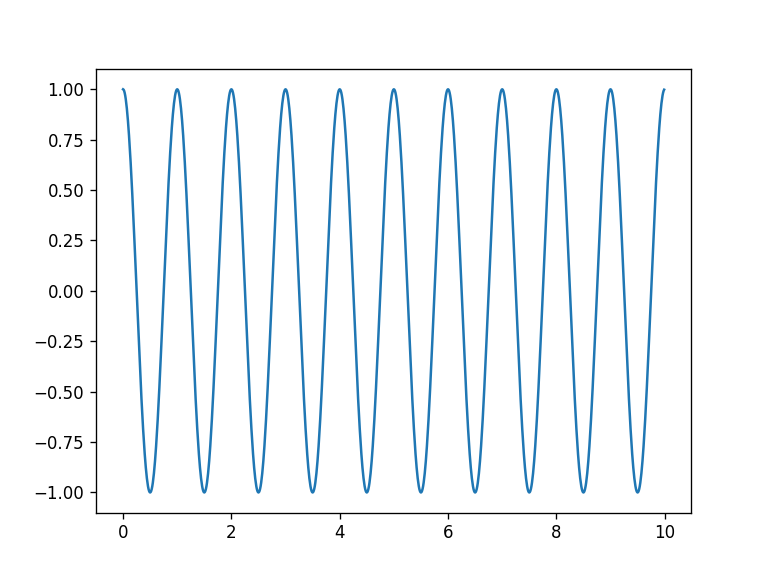

In [10]:
# Y' = f(Y,t) = M(t)xY(t)

def rk4(y0,yprim0,dt,tmax):
    n = int(tmax/dt)
    w0 = 2*pi
    
    t = np.arange(0,tmax,dt)
    Y = np.zeros((2,n))
    Y[:,0] = np.array([y0,yprim0])
    M = np.array([[0,1],[-w0**2,0]])
    for i in range(1,n):
        alpha = Y[:,i-1] +np.dot(M,Y[:,i-1])*dt/2
        beta = Y[:,i-1] +np.dot(M,alpha)*dt/2
        gamma = Y[:,i-1] +np.dot(M,beta)*dt
        Y[:,i] = Y[:,i-1] + dt/6 *(np.dot(M,Y[:,i-1])+2*np.dot(M,alpha) + 2*np.dot(M,beta)+np.dot(M,gamma))
    return t,Y



t,y = rk4(1,0.,0.01,10)
plt.figure("rk4")
plt.clf()
plt.plot(t,y[0,:])
plt.show()